In [ ]:
# Create second Training dataset

In [128]:
from pathlib import Path
import pandas as pd


In [287]:
data = pd.read_parquet(Path("../data") / "train.parquet")

In [288]:
critical_coutners = []
critical_dates = []

for location in data["counter_name"].unique():

    location_data = data[data["counter_name"] == location].groupby(pd.Grouper(freq="1d", key="date"))[["log_bike_count"]].sum()

    if location_data.loc[location_data['log_bike_count'] == 0].shape[0] != 0:
        critical_dates.append(location_data.loc[location_data['log_bike_count'] == 0].index)
        critical_coutners.append(location)

In [289]:
for location, dates in zip(critical_coutners, critical_dates):
    for date in dates:
        # Filter the original dataset for the given location and date, then replace 'log_bike_count' with np.nan
        mask = (data["counter_name"] == location) & (data["date"].dt.date == date.date())
        data.loc[mask, "log_bike_count"] = np.nan
        
    location_mean = data.loc[data["counter_name"] == location, "log_bike_count"].mean()
    data["log_bike_count"].fillna(location_mean, inplace=True)
        

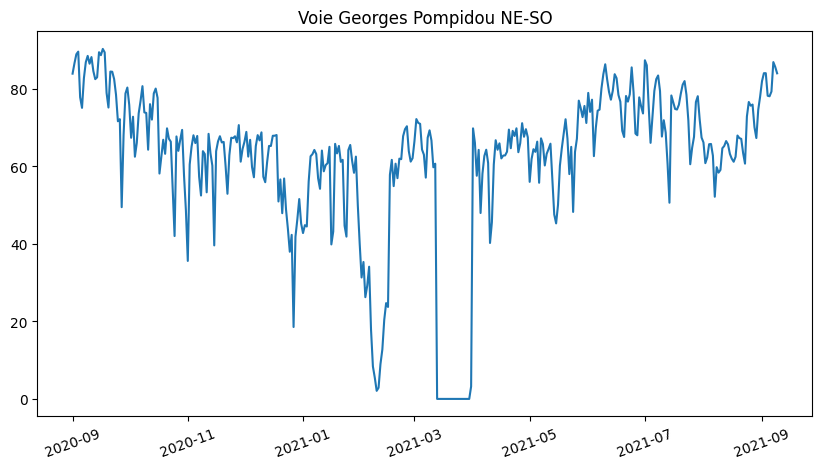

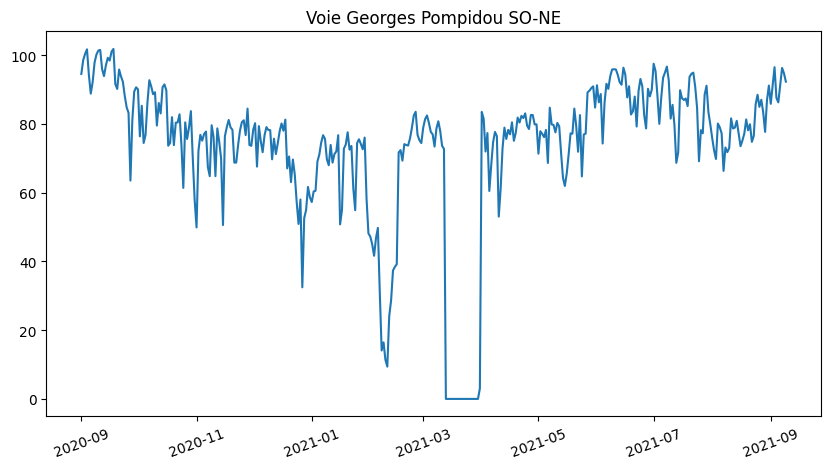

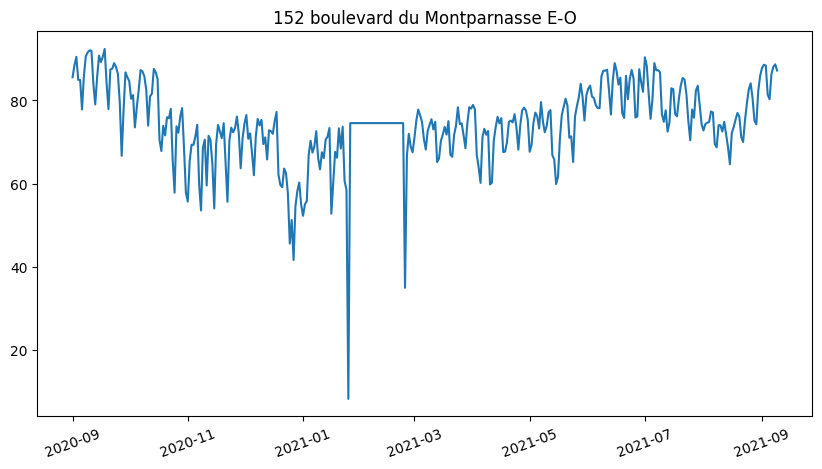

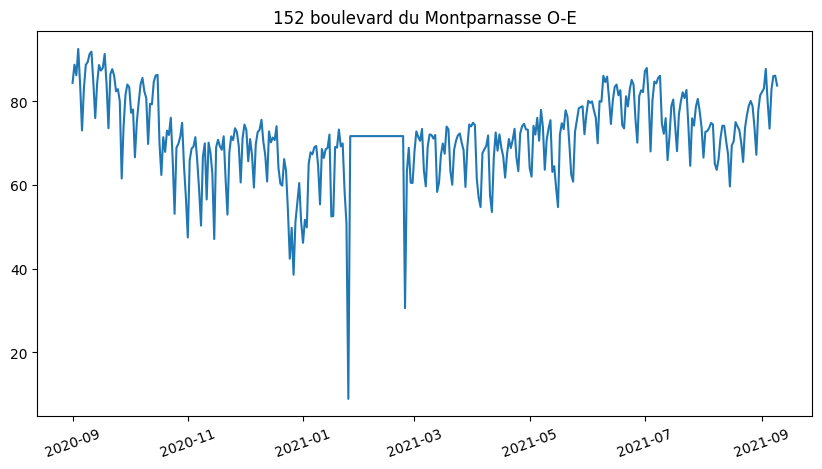

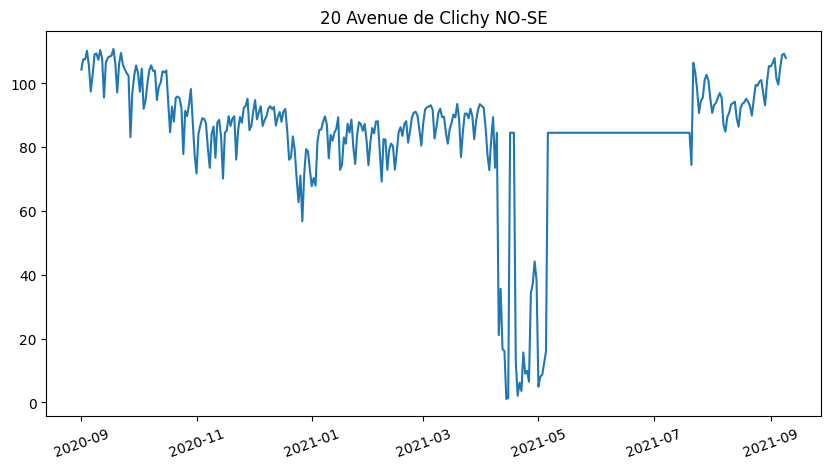

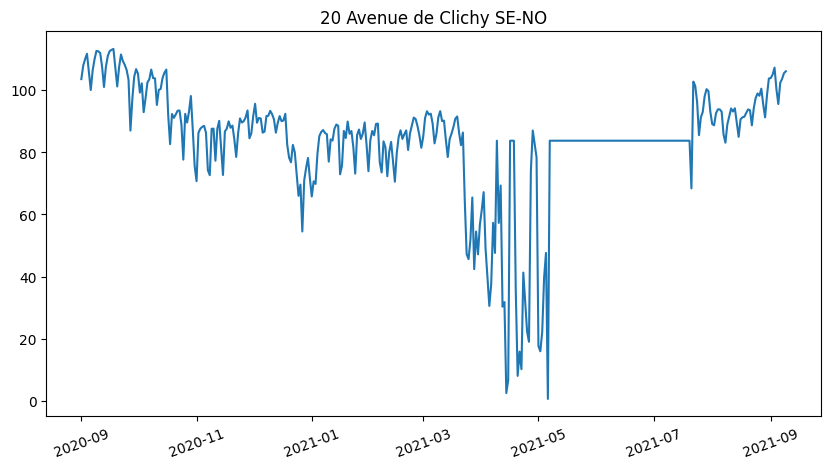

In [291]:
# Plot all bike_count evolution over the year for each counter

from matplotlib import pyplot as plt

counters = data["counter_name"].unique()

for counter in critical_coutners:
    
    mask = (data["counter_name"] == counter)
    plt.figure(figsize=(10,5))
    plt.plot(data[mask].groupby(pd.Grouper(freq="1d", key="date"))[["log_bike_count"]].sum())
    plt.title(counter)
    plt.xticks(rotation=20)
    
    plt.savefig(f'../models/iterations/{counter}_mean_imputation.png')
    
    